<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08

**Objetivo**: Aplicar técnicas de **machine learning no supervisado** para explorar, procesar y analizar conjuntos de datos con variables numéricas y categóricas.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.


## Clustering


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos **`vehiculos_procesado_con_grupos.csv`** recopila información sobre diversas características relevantes de distintos vehículos. El propósito de este ejercicio es **clasificar los vehículos en diferentes categorías**, utilizando como base las variables descritas en la tabla de atributos.

El análisis presenta un desafío adicional debido a la **naturaleza mixta de los datos**: se incluyen tanto variables **numéricas** (ej. dimensiones, consumo, emisiones) como **categóricas** (ej. tipo de tracción, tipo de combustible), lo que requiere aplicar técnicas de preprocesamiento adecuadas antes de entrenar los modelos.

Como primer paso, procederemos a **cargar y explorar el conjunto de datos**, con el fin de familiarizarnos con su estructura y las características que servirán como base para la posterior clasificación.




**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

- Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.
- Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

- Junte ambos dataset en uno, llamado **df_procesado**.

In [3]:
df_numeric = df.select_dtypes(include=np.number)
df_categorical = df.select_dtypes(exclude=np.number)

df_numeric = df_numeric.fillna(df_numeric.mean())

scaler = MinMaxScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(df_numeric_scaled, columns=df_numeric.columns)

df_categorical_encoded = pd.get_dummies(df_categorical)

df_procesado = pd.concat([df_numeric_scaled, df_categorical_encoded], axis=1)

display(df_procesado.head())

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.000000,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.029412,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0.029412,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.088235,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


La codificación de variables categóricas a numéricas utilizando pd.get_dummies funciona de la siguiente manera:

Por cada columna categórica en tu conjunto de datos, get_dummies crea nuevas columnas binarias. El número de nuevas columnas creadas es igual al número de categorías únicas en la columna original.

Por ejemplo, si tienes una columna llamada color con los valores 'rojo', 'azul' y 'verde', get_dummies creará tres nuevas columnas: color_rojo, color_azul y color_verde.

Para cada fila de tu conjunto de datos, en estas nuevas columnas, habrá un 1 en la columna que corresponde a la categoría de esa fila en la columna original, y 0 en las otras nuevas columnas.

En resumen, convierte cada categoría en una columna separada con valores binarios (0 o 1), lo que permite que los algoritmos de machine learning, que generalmente trabajan con datos numéricos, puedan procesar estas variables categóricas.

### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [4]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
kmeans.fit(df_procesado)

df_procesado['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Centroides de los clusters:")
display(pd.DataFrame(centroids, columns=df_procesado.columns[:-1]))

numeric_cols = df_numeric.columns
cluster_summary_mean = df_procesado.groupby('cluster')[numeric_cols].mean()
print("\nValor promedio de las variables numéricas por cluster:")
display(cluster_summary_mean)

cluster_summary_mode = df_procesado.groupby('cluster')[numeric_cols].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
print("\nModa de las variables numéricas por cluster:")
display(cluster_summary_mode)

categorical_cols_encoded = df_categorical_encoded.columns
cluster_summary_categorical = df_procesado.groupby('cluster')[categorical_cols_encoded].mean()
print("\nProporción de variables categóricas codificadas por cluster:")
display(cluster_summary_categorical)

Centroides de los clusters:


,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.427318,0.223790,0.173637,0.304599,0.226412,0.126441,0.097434,0.004835,0.088137,0.517665,...,1.831868e-15,9.776869e-01,9.048318e-15,9.076073e-15,2.231313e-02,4.635181e-15,9.921904e-01,7.809595e-03,4.246603e-15,-1.201816e-14
1,0.569367,0.169607,0.146057,0.240820,0.156357,0.007990,0.117281,0.017606,0.138407,0.629063,...,-1.232348e-14,-1.679212e-14,1.354280e-04,-1.024181e-14,9.998646e-01,-9.103829e-15,1.218852e-03,8.125677e-04,8.160139e-15,9.979686e-01
2,0.407666,0.331397,0.256796,0.354288,0.282121,0.181278,0.084035,0.090474,0.133564,0.184580,...,-7.271961e-15,1.386825e-02,9.808486e-01,7.355228e-15,5.283143e-03,1.155688e-03,-1.712519e-14,9.988443e-01,-6.022960e-15,-1.582068e-15
3,0.476969,0.450984,0.327266,0.410019,0.343261,0.304450,0.017116,0.041506,0.048567,0.151048,...,9.584938e-01,-1.421085e-14,4.065041e-02,8.557980e-04,-6.578071e-15,9.957210e-01,7.494005e-16,6.418485e-04,3.637142e-03,-1.768030e-14
4,0.384236,0.585590,0.430797,0.510289,0.454503,0.259250,0.005599,0.059153,0.059396,0.197420,...,3.115871e-02,-1.321165e-14,1.168452e-02,9.571568e-01,-6.494805e-15,1.703992e-03,7.494005e-16,4.868549e-04,9.978092e-01,-1.662559e-14
5,0.588730,0.362290,0.299545,0.354136,0.282247,0.001505,0.083020,0.086531,0.189616,0.558816,...,5.016303e-04,2.608478e-02,9.731628e-01,1.360023e-14,2.508151e-04,2.357662e-02,7.771561e-16,9.764234e-01,-1.040834e-14,-1.634803e-14
6,0.452443,0.562730,0.405562,0.501887,0.442585,0.435441,0.001318,0.003953,0.010211,0.058300,...,5.764163e-02,-1.032507e-14,5.599473e-03,9.367589e-01,-6.300516e-15,6.883383e-15,7.216450e-16,-9.436896e-15,1.000000e+00,-1.357248e-14
7,0.579550,0.269830,0.210005,0.305067,0.226473,0.025947,0.094316,0.072488,0.192545,0.397446,...,6.177924e-04,9.619028e-01,8.237232e-04,1.523781e-14,3.665568e-02,2.969847e-15,9.684926e-01,2.944811e-02,-1.587619e-14,2.059308e-03



Valor promedio de las variables numéricas por cluster:


,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,0.427318,0.223790,0.173637,0.304599,0.226412
1,0.569367,0.169607,0.146057,0.240820,0.156357
2,0.407666,0.331397,0.256796,0.354288,0.282121
3,0.476969,0.450984,0.327266,0.410019,0.343261
4,0.384236,0.585590,0.430797,0.510289,0.454503
5,0.588730,0.362290,0.299545,0.354136,0.282247
6,0.452443,0.562730,0.405562,0.501887,0.442585
7,0.579550,0.269830,0.210005,0.305067,0.226473



Moda de las variables numéricas por cluster:


,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,0.000000,0.179487,0.142857,0.317749,0.241830
1,0.970588,0.179487,0.142857,0.275108,0.194444
2,0.000000,0.307692,0.285714,0.374603,0.305011
3,0.029412,0.474359,0.285714,0.424351,0.331027
4,0.000000,0.564103,0.428571,0.454199,0.393464
5,0.617647,0.307692,0.285714,0.374603,0.281734
6,0.558824,0.653846,0.428571,0.454199,0.393464
7,0.970588,0.179487,0.142857,0.317749,0.241830



Proporción de variables categóricas codificadas por cluster:


,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.126441,0.097434,0.004835,0.088137,0.517665,0.083302,0.008181,0.074005,0.200818,0.799182,...,0.000000,0.977687,0.000000,0.000000,0.022313,0.000000,0.992190,0.007810,0.000000,0.000000
1,0.007990,0.117281,0.017606,0.138407,0.629063,0.080580,0.001625,0.007449,0.092904,0.907096,...,0.000000,0.000000,0.000135,0.000000,0.999865,0.000000,0.001219,0.000813,0.000000,0.997969
2,0.181278,0.084035,0.090474,0.133564,0.184580,0.171042,0.066700,0.088328,0.217434,0.782566,...,0.000000,0.013868,0.980849,0.000000,0.005283,0.001156,0.000000,0.998844,0.000000,0.000000
3,0.304450,0.017116,0.041506,0.048567,0.151048,0.236842,0.088361,0.112110,0.394309,0.605691,...,0.958494,0.000000,0.040650,0.000856,0.000000,0.995721,0.000000,0.000642,0.003637,0.000000
4,0.259250,0.005599,0.059153,0.059396,0.197420,0.074489,0.287001,0.057692,0.000000,1.000000,...,0.031159,0.000000,0.011685,0.957157,0.000000,0.001704,0.000000,0.000487,0.997809,0.000000
5,0.001505,0.083020,0.086531,0.189616,0.558816,0.076248,0.000752,0.003511,0.334337,0.665663,...,0.000502,0.026085,0.973163,0.000000,0.000251,0.023577,0.000000,0.976423,0.000000,0.000000
6,0.435441,0.001318,0.003953,0.010211,0.058300,0.271080,0.047101,0.172596,1.000000,0.000000,...,0.057642,0.000000,0.005599,0.936759,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
7,0.025947,0.094316,0.072488,0.192545,0.397446,0.184102,0.007208,0.025947,0.240527,0.759473,...,0.000618,0.961903,0.000824,0.000000,0.036656,0.000000,0.968493,0.029448,0.000000,0.002059


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

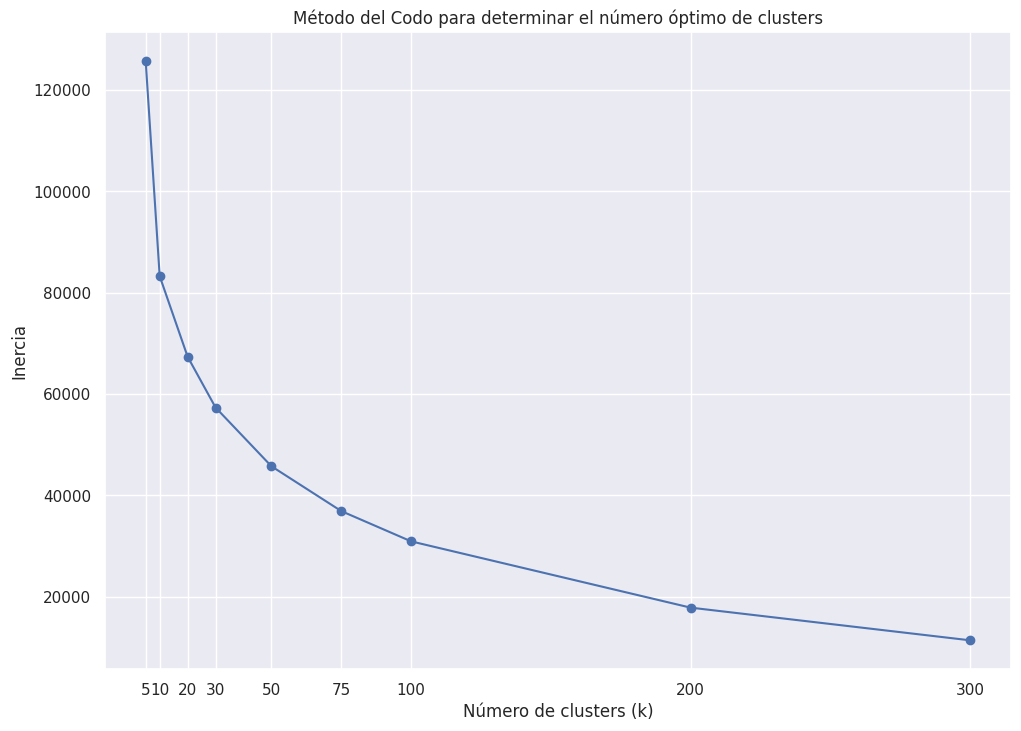

In [5]:
inertia = []
k_values = [5, 10, 20, 30, 50, 75, 100, 200, 300]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_procesado)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

Conclusiones : se observa una disminución significativa en la inercia a medida que aumenta el número de clusters inicialmente. Sin embargo, la tasa de disminución comienza a ralentizarse alrededor de los 50-75 clusters, formando una especie de "codo".

Esto sugiere que, si bien un mayor número de clusters seguirá reduciendo la inercia, las ganancias se vuelven marginales después de este punto. Por lo tanto, según la regla del codo, un número de clusters en el rango de 50 a 75 podría ser una elección razonable, ya que ofrece un buen equilibrio entre la reducción de la inercia y la complejidad del modelo.

La elección final del número de clusters puede depender también de la interpretabilidad de los clusters resultantes y del objetivo específico del análisis.

## Reducción de Dimensionalidad

<img src="https://1000logos.net/wp-content/uploads/2020/11/Wine-Logo-old.png" width = "300" align="center"/>


Para este ejercicio utilizaremos el **Wine Dataset**, un conjunto de datos clásico disponible en la librería **scikit-learn** y en el repositorio de la **UCI Machine Learning**.
Este dataset contiene información de **178 muestras de vino** provenientes de la región italiana de *Piamonte*. Cada vino pertenece a una de **tres variedades de uva** (*clases*), que actúan como etiquetas para el análisis supervisado, pero aquí se usarán solo como referencia en la visualización.

Cada muestra está descrita por **13 variables químicas** obtenidas de un análisis de laboratorio, entre ellas:

* **Alcohol**: porcentaje de alcohol en el vino.
* **Malic acid**: concentración de ácido málico.
* **Ash**: contenido de ceniza.
* **Alcalinity of ash**: alcalinidad de la ceniza.
* **Magnesium**: cantidad de magnesio (mg/L).
* **Total phenols**: concentración total de fenoles.
* **Flavanoids**: tipo de fenoles con propiedades antioxidantes.
* **Nonflavanoid phenols**: fenoles que no son flavonoides.
* **Proanthocyanins**: compuestos relacionados con el color y el sabor.
* **Color intensity**: intensidad del color del vino.
* **Hue**: matiz del color.
* **OD280/OD315 of diluted wines**: relación de absorbancia que mide la calidad del vino.
* **Proline**: concentración de prolina (un aminoácido).

Estas características permiten representar cada vino como un punto en un espacio de **13 dimensiones**.

El objetivo del análisis con este dataset es **reducir la dimensionalidad** para visualizar y explorar patrones en los datos. Para ello aplicaremos:

* **PCA (Principal Component Analysis):** identificar las combinaciones lineales de variables que explican la mayor varianza en el conjunto.
* **t-SNE (t-distributed Stochastic Neighbor Embedding):** mapear las muestras a 2D o 3D, preservando relaciones de vecindad y estructuras no lineales.

La comparación entre ambas técnicas permitirá observar cómo las tres clases de vinos se diferencian en el espacio reducido y discutir la utilidad de la reducción de dimensionalidad en datos con mayor número de variables que en el caso del dataset Iris.



In [6]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [7]:
# cargar dataset
dataset = load_wine()

# nombres de las variables
features = dataset.feature_names
target = 'wine_class'

# construir DataFrame
wine = pd.DataFrame(dataset.data, columns=features)
wine[target] = dataset.target

# ver primeras filas
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




### 1. **Análisis detallado con PCA**

* Calcular la **varianza explicada** por cada componente principal y representar el gráfico de varianza acumulada, identificando cuántos componentes son necesarios para capturar al menos el **90–95% de la información**.
* Construir tablas y gráficos que muestren cómo las observaciones (vinos) se proyectan en las primeras componentes principales.
* Analizar los **loadings** (coeficientes de cada variable en los componentes) e interpretar qué características químicas del vino (alcohol, fenoles, color, etc.) tienen mayor influencia en las nuevas dimensiones.
* Visualizar los datos reducidos a 2D o 3D e interpretar si las **tres variedades de vino** se separan de forma clara en el espacio proyectado.



Número de componentes para capturar al menos 90% de la varianza: 1
Número de componentes para capturar al menos 95% de la varianza: 1


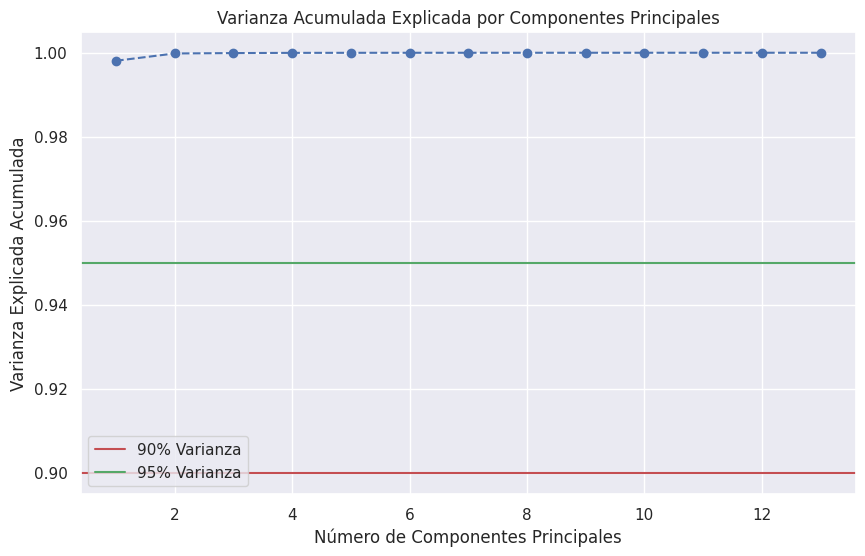


Proyección de las observaciones en las primeras 2 componentes principales:


,PC1,PC2,wine_class
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,0


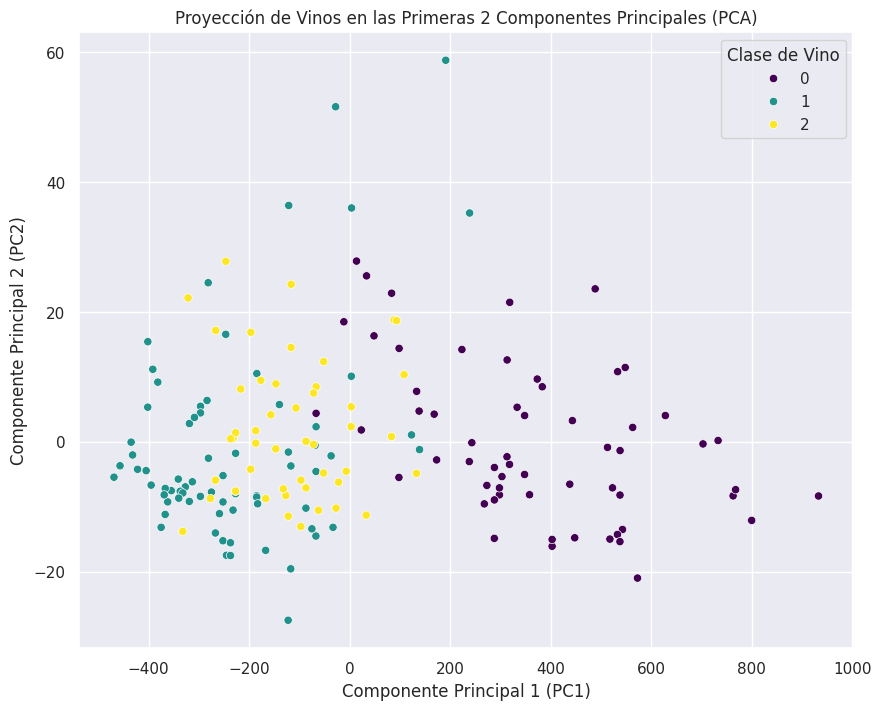


Proyección de las observaciones en las primeras 3 componentes principales:


,PC1,PC2,PC3,wine_class
0,318.562979,21.492131,-3.130735,0
1,303.097420,-5.364718,-6.822835,0
2,438.061133,-6.537309,1.113223,0
3,733.240139,0.192729,0.917257,0
4,-11.571428,18.489995,0.554422,0


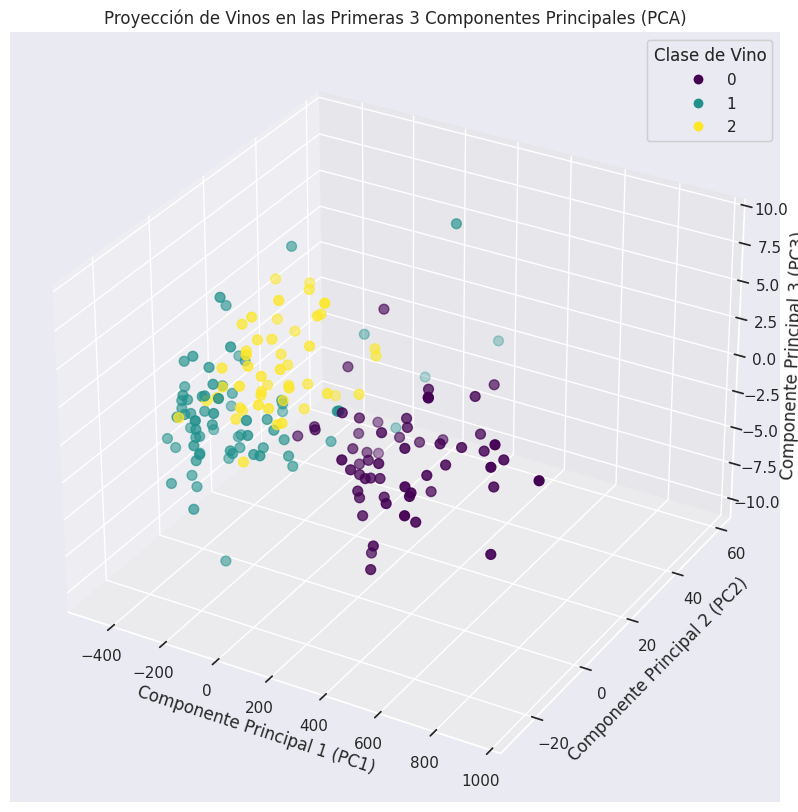


Loadings (coeficientes) de las variables en las primeras componentes principales:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
PC1,0.001659,-0.000681,0.000195,-0.004671,0.017868,0.000990,0.001567,-0.000123,0.000601,0.002327,0.000171,0.000705,0.999823
PC2,0.001203,0.002155,0.004594,0.026450,0.999344,0.000878,-0.000052,-0.001354,0.005004,0.015100,-0.000763,-0.003495,-0.017774
PC3,0.016874,0.122003,0.051987,0.938593,-0.029780,-0.040485,-0.085443,0.013511,-0.024659,0.291398,-0.025978,-0.070324,0.004529
PC4,0.141447,0.160390,-0.009773,-0.330965,-0.005394,-0.074585,-0.169087,0.010806,-0.050121,0.878894,-0.060035,-0.178200,-0.003113
PC5,-0.020337,0.612883,-0.020176,-0.064352,0.006149,-0.315245,-0.524761,0.029648,-0.251183,-0.331747,-0.051524,-0.260639,0.002299
PC6,0.194120,0.742473,0.041753,-0.024065,-0.001924,0.278717,0.433598,-0.021953,0.241884,0.002740,-0.023776,0.288913,-0.001212
PC7,0.923280,-0.150110,0.045010,0.031527,0.001797,-0.020186,-0.038869,-0.004665,-0.309799,-0.112837,0.030820,0.101974,-0.001076
PC8,0.284821,-0.064674,-0.149340,0.015154,-0.003552,-0.177238,-0.248117,0.006498,0.870433,-0.081287,-0.002952,-0.186715,0.000010
PC9,-0.086601,-0.015662,-0.073650,-0.002045,0.001964,-0.255673,-0.378307,-0.036752,0.051520,0.099029,-0.033065,0.873747,0.000073
PC10,-0.002245,-0.018509,-0.086800,0.003554,-0.000041,0.847195,-0.520138,0.037713,0.009723,-0.023147,-0.038470,0.017017,0.000049


In [8]:
pca = PCA()
pca.fit(wine[features])

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)

components_90_percent = np.where(cumulative_explained_variance >= 0.90)[0][0] + 1
components_95_percent = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1

print(f"Número de componentes para capturar al menos 90% de la varianza: {components_90_percent}")
print(f"Número de componentes para capturar al menos 95% de la varianza: {components_95_percent}")

plt.axhline(y=0.90, color='r', linestyle='-', label='90% Varianza')
plt.axhline(y=0.95, color='g', linestyle='-', label='95% Varianza')
plt.legend()
plt.show()

pca_2d = PCA(n_components=2)
wine_pca_2d = pca_2d.fit_transform(wine[features])
wine_pca_2d_df = pd.DataFrame(wine_pca_2d, columns=['PC1', 'PC2'])
wine_pca_2d_df['wine_class'] = wine['wine_class']

print("\nProyección de las observaciones en las primeras 2 componentes principales:")
display(wine_pca_2d_df.head())

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='wine_class', data=wine_pca_2d_df, palette='viridis')
plt.title('Proyección de Vinos en las Primeras 2 Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend(title='Clase de Vino')
plt.grid(True)
plt.show()

pca_3d = PCA(n_components=3)
wine_pca_3d = pca_3d.fit_transform(wine[features])
wine_pca_3d_df = pd.DataFrame(wine_pca_3d, columns=['PC1', 'PC2', 'PC3'])
wine_pca_3d_df['wine_class'] = wine['wine_class']

print("\nProyección de las observaciones en las primeras 3 componentes principales:")
display(wine_pca_3d_df.head())

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(wine_pca_3d_df['PC1'], wine_pca_3d_df['PC2'], wine_pca_3d_df['PC3'], c=wine_pca_3d_df['wine_class'], cmap='viridis', s=50)

ax.set_title('Proyección de Vinos en las Primeras 3 Componentes Principales (PCA)')
ax.set_xlabel('Componente Principal 1 (PC1)')
ax.set_ylabel('Componente Principal 2 (PC2)')
ax.set_zlabel('Componente Principal 3 (PC3)')
legend = ax.legend(*scatter.legend_elements(), title="Clase de Vino")
ax.add_artist(legend)
plt.show()

print("\nLoadings (coeficientes) de las variables en las primeras componentes principales:")
display(pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.components_.shape[0])]))



### 2. **Análisis detallado con t-SNE**

* Aplicar **t-SNE** para reducir los datos a 2 dimensiones, probando diferentes configuraciones de hiperparámetros como *perplexity* y *learning rate*.
* Comparar las distintas visualizaciones obtenidas y discutir cómo los hiperparámetros afectan la estructura de los clústeres.
* Analizar si las **tres clases de vinos** forman agrupaciones definidas y si t-SNE logra capturar relaciones no lineales que PCA no refleja.




Aplicando t-SNE con perplexity=5, learning_rate=10


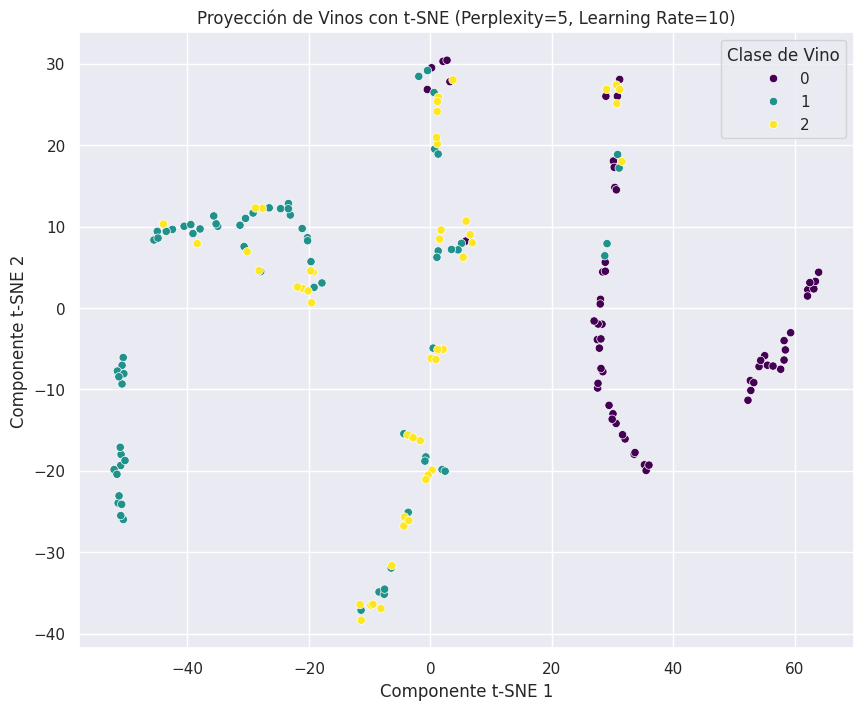


Aplicando t-SNE con perplexity=5, learning_rate=100


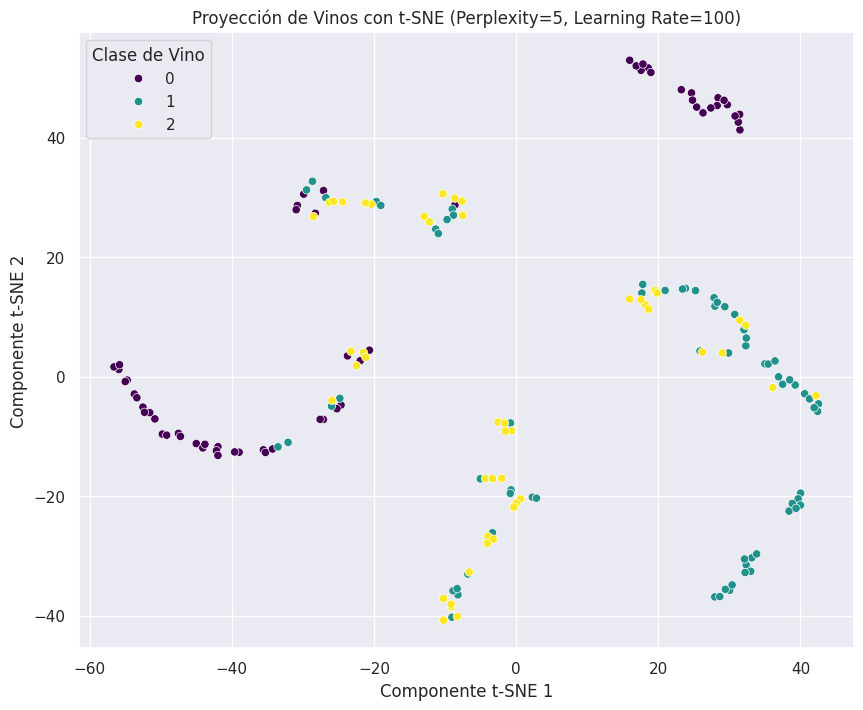


Aplicando t-SNE con perplexity=5, learning_rate=200


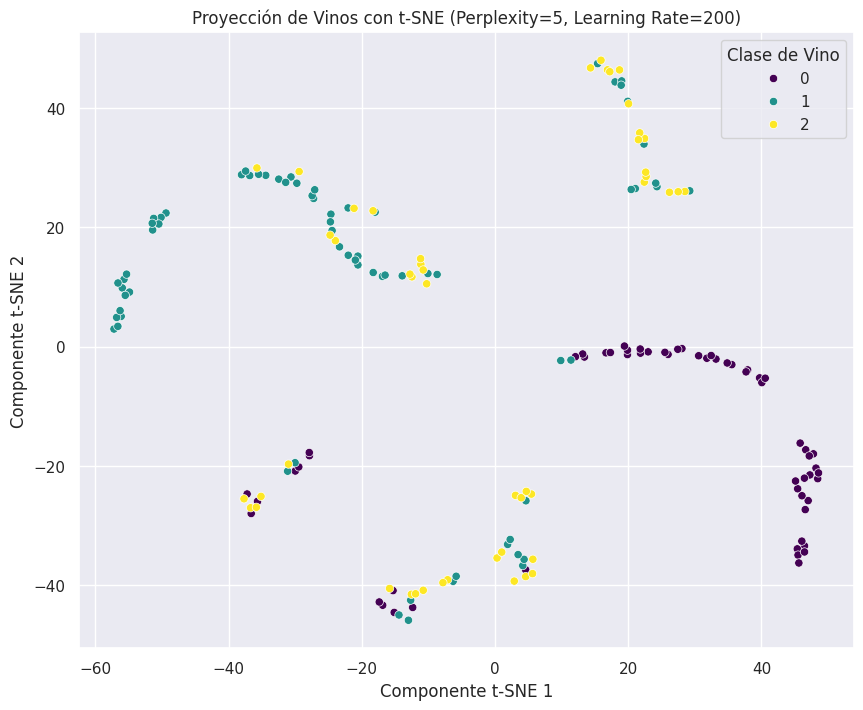


Aplicando t-SNE con perplexity=30, learning_rate=10


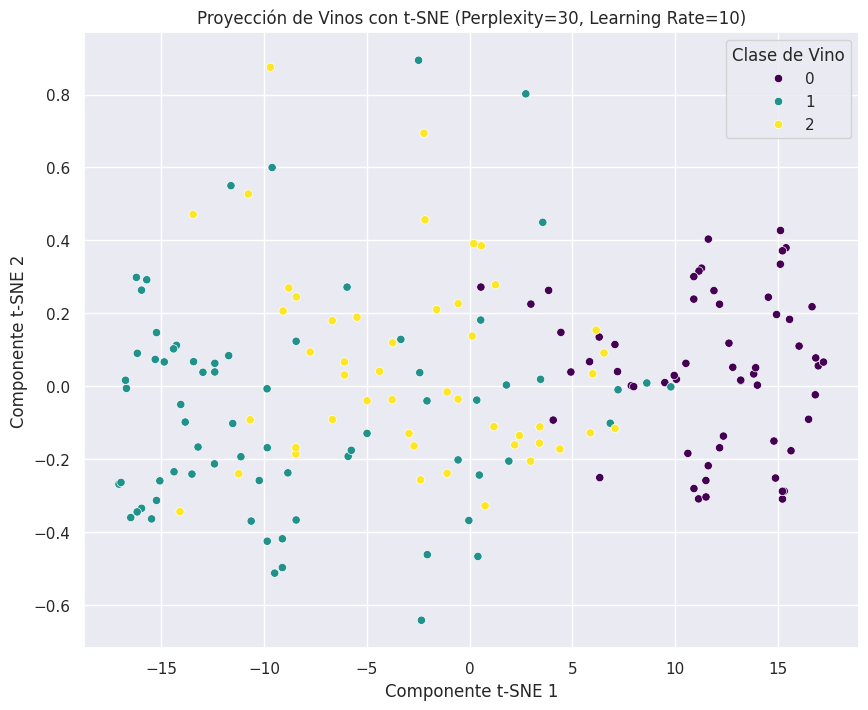


Aplicando t-SNE con perplexity=30, learning_rate=100


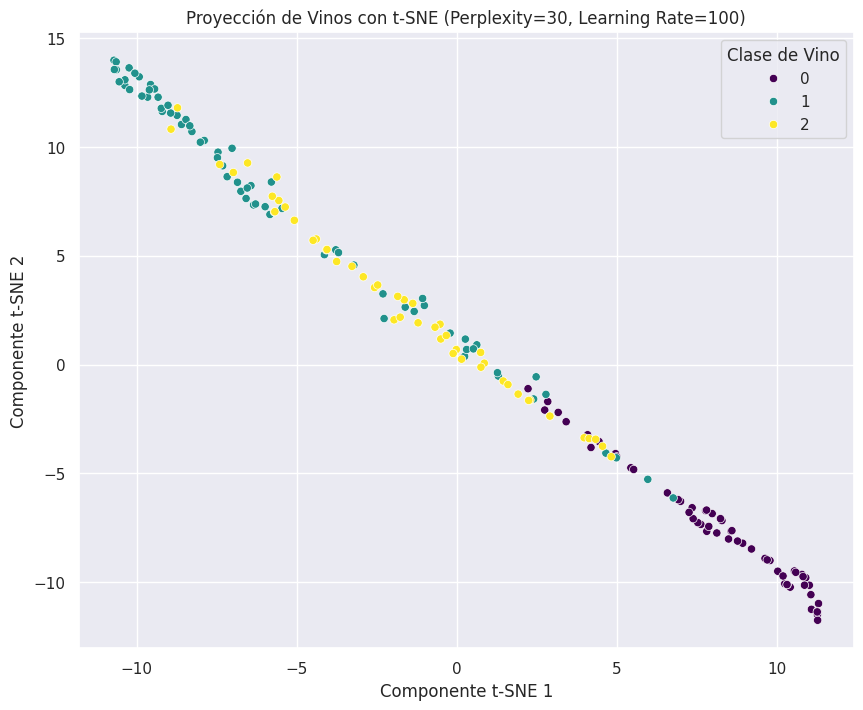


Aplicando t-SNE con perplexity=30, learning_rate=200


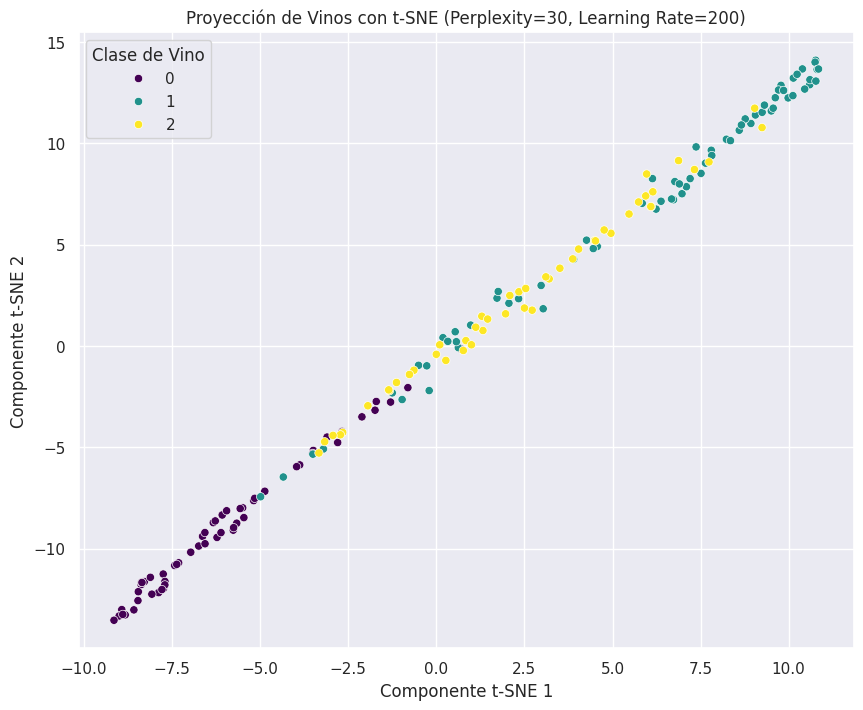


Aplicando t-SNE con perplexity=50, learning_rate=10


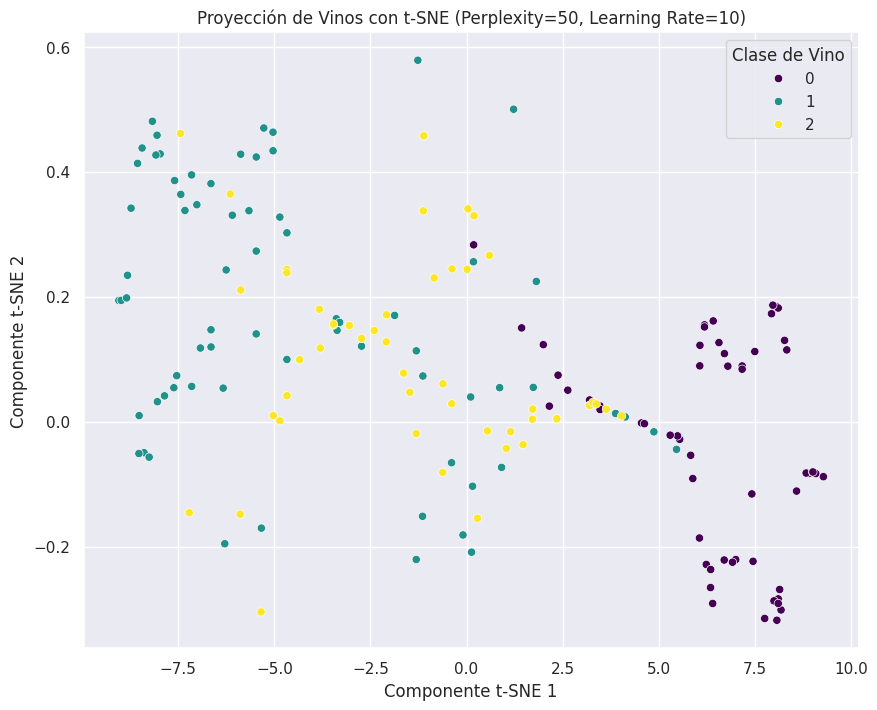


Aplicando t-SNE con perplexity=50, learning_rate=100


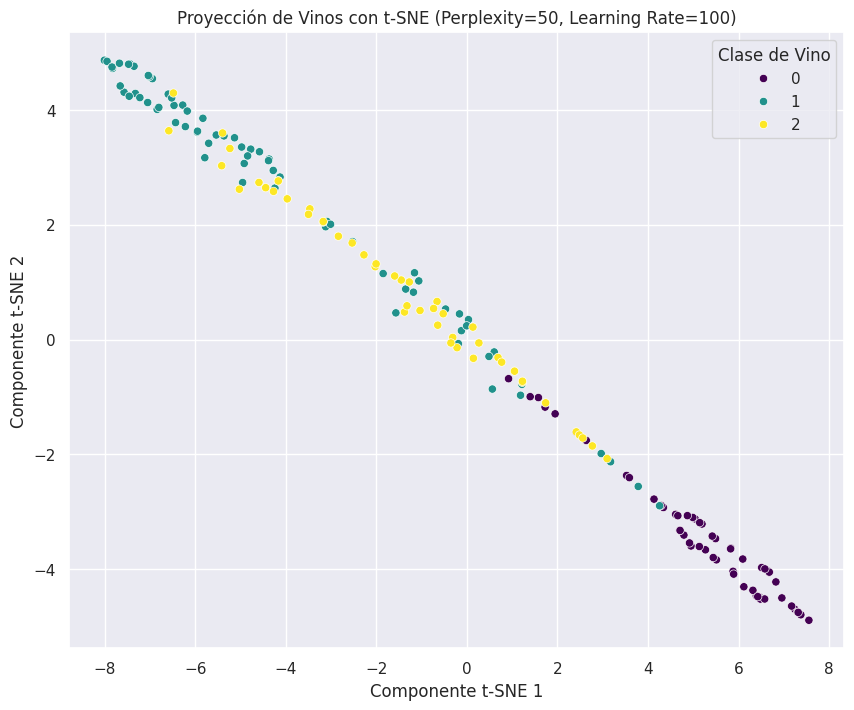


Aplicando t-SNE con perplexity=50, learning_rate=200


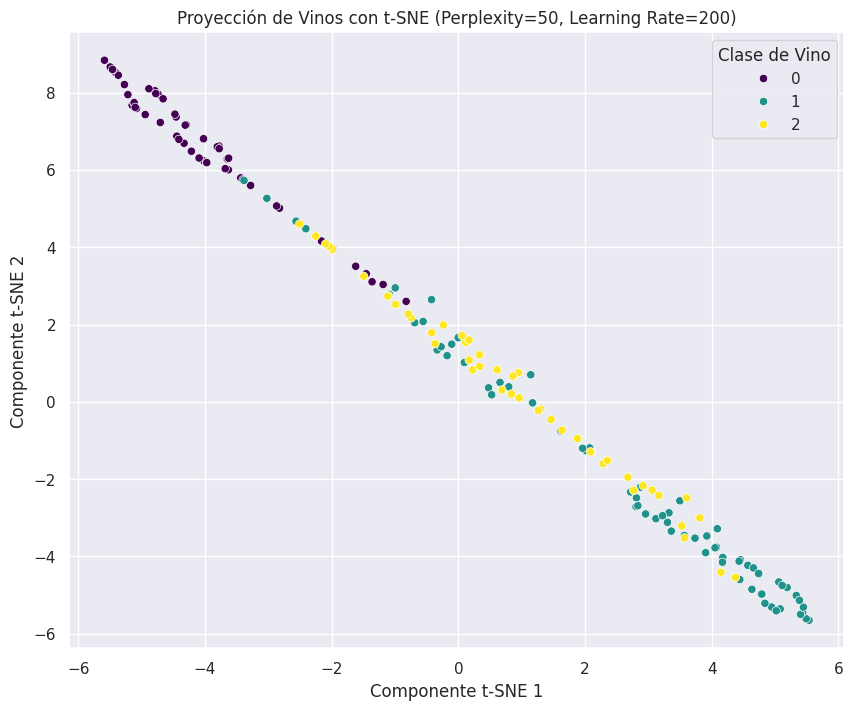

In [9]:
perplexities = [5, 30, 50]
learning_rates = [10, 100, 200]

for perplexity in perplexities:
    for learning_rate in learning_rates:
        print(f"\nAplicando t-SNE con perplexity={perplexity}, learning_rate={learning_rate}")
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, learning_rate=learning_rate, init='pca')
        wine_tsne = tsne.fit_transform(wine[features])
        wine_tsne_df = pd.DataFrame(wine_tsne, columns=['TSNE1', 'TSNE2'])
        wine_tsne_df['wine_class'] = wine['wine_class']

        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='TSNE1', y='TSNE2', hue='wine_class', data=wine_tsne_df, palette='viridis')
        plt.title(f'Proyección de Vinos con t-SNE (Perplexity={perplexity}, Learning Rate={learning_rate})')
        plt.xlabel('Componente t-SNE 1')
        plt.ylabel('Componente t-SNE 2')
        plt.legend(title='Clase de Vino')
        plt.grid(True)
        plt.show()



### 3. **Comparación entre PCA y t-SNE**

* Contrastar las visualizaciones y discutir las **ventajas y limitaciones** de cada técnica:

  * PCA como método **lineal** para interpretar varianza y relaciones globales.
  * t-SNE como método **no lineal** que preserva relaciones locales y vecindades.
* Evaluar en qué escenarios prácticos sería más recomendable usar PCA (interpretabilidad, reducción previa para modelos) o t-SNE (exploración y visualización de clústeres).
* Reflexionar sobre la **importancia de la reducción de dimensionalidad** en datasets de alta dimensión como Wine, destacando su utilidad para:

  * Visualizar patrones ocultos en los datos.
  * Reducir complejidad y ruido antes de aplicar algoritmos de aprendizaje automático.
  * Facilitar la interpretación y comunicación de resultados.



### 3. **Comparación entre PCA y t-SNE**

Al comparar las visualizaciones obtenidas con PCA y t-SNE en el conjunto de datos Wine, podemos discutir las ventajas y limitaciones de cada técnica:

*   **PCA (Principal Component Analysis):**
    *   **Ventajas:** Es un método lineal que es fácil de interpretar. Los componentes principales son combinaciones lineales de las variables originales, y los loadings nos indican la contribución de cada variable a cada componente. PCA busca maximizar la varianza explicada, por lo que es útil para identificar las direcciones de mayor dispersión en los datos y puede ser utilizado como un paso de preprocesamiento para reducir la dimensionalidad antes de aplicar otros algoritmos de aprendizaje automático. También es computacionalmente menos costoso que t-SNE.
    *   **Limitaciones:** Al ser lineal, PCA puede no ser efectivo para capturar estructuras no lineales o relaciones complejas en los datos. Si los clusters se forman en base a interacciones no lineales entre las variables, PCA podría no separarlos claramente.

*   **t-SNE (t-distributed Stochastic Neighbor Embedding):**
    *   **Ventajas:** Es un método no lineal que es muy efectivo para visualizar datos de alta dimensión en espacios de 2D o 3D, preservando las relaciones de vecindad local. Es especialmente bueno para revelar la estructura de clusters en los datos, incluso si estos clusters no son linealmente separables. Las visualizaciones de t-SNE a menudo muestran agrupaciones claras de las clases (como se observó con las clases de vino), lo que facilita la exploración de la estructura de los datos.
    *   **Limitaciones:** t-SNE es computacionalmente más intensivo que PCA, especialmente para grandes conjuntos de datos. Además, su naturaleza estocástica significa que diferentes ejecuciones pueden producir visualizaciones ligeramente diferentes. La interpretación de los ejes en un gráfico de t-SNE no es tan directa como en PCA (los ejes no representan direcciones de máxima varianza). La "distancia" entre clusters en un gráfico de t-SNE puede no reflejar directamente la distancia real en el espacio de alta dimensión; t-SNE se centra más en preservar las relaciones de "vecindad". La elección de hiperparámetros como `perplexity` y `learning rate` puede tener un impacto significativo en la visualización resultante, requiriendo experimentación.

**Evaluación en escenarios prácticos:**

*   Sería más recomendable usar **PCA** cuando:
    *   Se necesita interpretar la contribución de las variables originales a las nuevas dimensiones (loadings).
    *   Se busca una reducción de dimensionalidad rápida y lineal como paso previo para otros modelos de machine learning.
    *   La interpretabilidad de los componentes es importante para entender la estructura global de los datos.
*   Sería más recomendable usar **t-SNE** cuando:
    *   El objetivo principal es visualizar la estructura de los datos de alta dimensión y explorar posibles clusters.
    *   Se sospecha que existen relaciones no lineales en los datos que PCA no podría capturar.
    *   La preservación de las relaciones de vecindad local es crucial para el análisis.

**Reflexión sobre la importancia de la reducción de dimensionalidad en datasets de alta dimensión como Wine:**

La reducción de dimensionalidad es fundamental en datasets de alta dimensión como el de Wine por varias razones:

*   **Visualizar patrones ocultos:** Es prácticamente imposible visualizar datos en 13 dimensiones. Técnicas como PCA y t-SNE nos permiten proyectar estos datos en 2D o 3D, haciendo posible identificar visualmente agrupaciones, tendencias o patrones que de otro modo permanecerían ocultos. En el caso del Wine dataset, pudimos ver cómo las diferentes clases de vino tienden a agruparse en los espacios reducidos.
*   **Reducir complejidad y ruido:** Los datasets de alta dimensión a menudo contienen ruido o variables redundantes que pueden afectar negativamente el rendimiento de los algoritmos de aprendizaje automático. La reducción de dimensionalidad puede ayudar a eliminar este ruido y a quedarse con las características más relevantes que capturan la mayor parte de la información útil.
*   **Facilitar la interpretación y comunicación de resultados:** Las visualizaciones en 2D o 3D son mucho más fáciles de interpretar y comunicar a otros que los análisis en alta dimensión. Permiten explicar de manera intuitiva las relaciones entre los puntos de datos y la estructura general del conjunto de datos.
*   **Mitigar la "maldición de la dimensionalidad":** En alta dimensión, los datos se vuelven muy dispersos, lo que puede dificultar la aplicación de ciertos algoritmos de machine learning y aumentar la cantidad de datos necesarios para que los modelos sean efectivos. La reducción de dimensionalidad ayuda a abordar este problema.

En conclusión, tanto PCA como t-SNE son herramientas valiosas para trabajar con datos de alta dimensión, cada una con sus fortalezas. PCA es más útil para entender la estructura global y como paso de preprocesamiento lineal, mientras que t-SNE sobresale en la visualización de estructuras de clusters no lineales y relaciones locales. La elección entre ellas (o el uso de ambas) depende del objetivo específico del análisis.